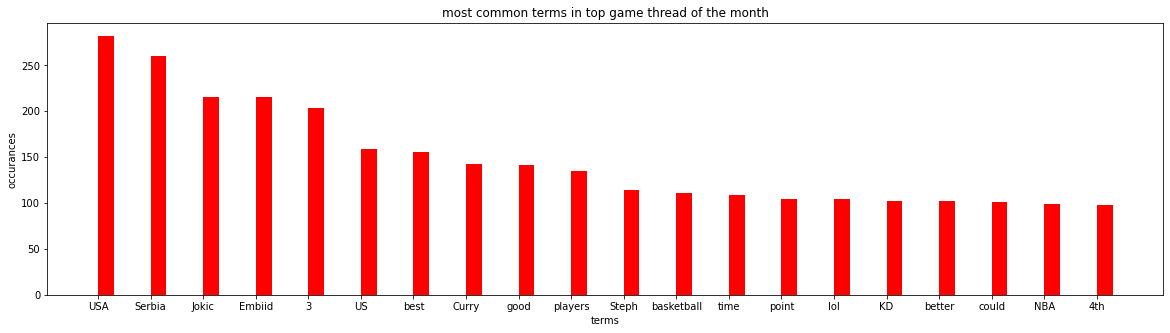

In [1]:
import praw
from nltk.corpus import stopwords
import string
import operator
import matplotlib.pyplot as plt

# initialize reddit class
# api key and secret for nbabot1 stored in praw.ini file located in .config file
reddit = praw.Reddit("nbabot1", user_agent="script by u/Prestigious_Juice_97")

# create dictionary to hold number of occurances in submissions
term_count = {}

#create list of stop words to avoid counting
punc = list(string.punctuation)
filler_words = ["[Post", "Game", "Thread]", 
"i", "would", "really", "like", "team", "got", "get", "he'","he", "the", "think", 
"still", "they", "i'm", "it", "if", "even", "much", "gonna", "going", "well", "", 
"play", "played", "game", "know", "game.", "playing", "see", "one", "least", "last"]
stop = stopwords.words("english") + punc + filler_words
# iterate through top game threads of the month
for submission in reddit.subreddit("nba").search(query="[Post Game Thread]",sort="relevance", time_filter="month", limit=1):
    # parse through title first
    for term in submission.title.split(" "):
        if term not in stop:
            term_count[term] = 1 + term_count.get(term, 0)
    # parse through comments in each submission and use queue to parse through comment replies
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        for term in comment.body.split(" "):
            if term.lower() not in stop:
                term_count[term] = 1 + term_count.get(term, 0)


# get top 20 highest occuring terms
res = dict(sorted(term_count.items(), key=operator.itemgetter(1), reverse=True)[:20])

terms = list(res.keys())
values = list(res.values())

fig = plt.figure(figsize= (20, 5))

# create bar graph
plt.bar(terms, values, color="red", width = 0.3, align="edge")
plt.xlabel("terms")
plt.ylabel("occurances")
plt.title("most common terms in top game thread of the month")
plt.show()


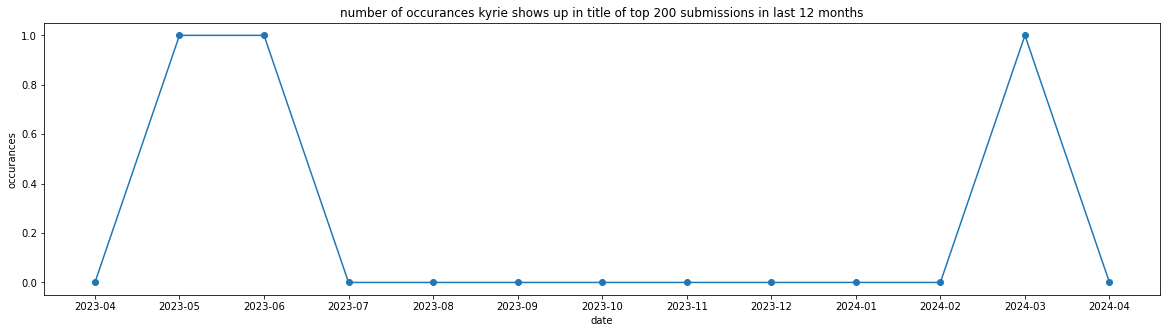

In [119]:
from datetime import datetime

# store titles and dates of top 200 submissions in the last year
title_to_date = []
for submission in reddit.subreddit("nba").top(time_filter="year", limit=200):
    date = datetime.utcfromtimestamp(submission.created_utc)
    title_to_date.append([date.date().strftime("%Y-%m") ,submission.title])

# example search term
search_term = "kyrie"    

date_to_occ = {}
# initialize dictionary with all dates
for pair in title_to_date:
    date_to_occ[pair[0]] = 0

# count number of occurances of search terms in titles
for i in range(len(title_to_date)):
    for term in title_to_date[i][1].split(" "):
        if term.lower() == search_term:
            date_to_occ[title_to_date[i][0]] = 1 + date_to_occ.get(title_to_date[i][0])

# plot results
res = dict(sorted(date_to_occ.items(), key=operator.itemgetter(0)))
dates = list(res.keys())
values = list(res.values())

fig = plt.figure(figsize= (20, 5))

plt.scatter(dates, values)
plt.plot(dates, values)
plt.xlabel("date")
plt.ylabel("occurances")
plt.title(f"number of occurances {search_term} shows up in title of top 200 submissions in last 12 months")
plt.show()